In [ ]:
import warnings
warnings.filterwarnings("ignore")
import PyPDF2

filepath = "GS.08.54388_Failure_analysis_of_aramid_reinforced_guide-straps_ex_Brigantine_platform.pdf"
pdfFileObj = open(filepath, 'rb') 
pdfreader = PyPDF2.PdfFileReader(pdfFileObj) 
count = pdfreader.numPages

text = ''
#text = []
for j in range(count):
    page = pdfreader.getPage(j)
    pp = page.extractText()
#    text.append(pp)
    text = text + pp
        
#print(text)

In [22]:
##from pytldr.nlp.tokenizer import Tokenizer
##from pytldr.summarize.lsa import LsaSummarizer, LsaOzsoy, LsaSteinberger

##tokenizer = Tokenizer(language='english', stopwords=None, stemming=True)

# Note that if stopwords=None then the tokenizer loads stopwords from a bundled data-set
# You can alternatively specify a text file or provide a list of words

#summarizer = LsaOzsoy()
#summarizer = LsaSteinberger()
##summarizer = LsaSummarizer()  # This is identical to the LsaOzsoy object

##summary = summarizer.summarize(text, topics=4, length=5, binary_matrix=True, topic_sigma_threshold=0.5)

# topics specifies the number of topics to cluster the article into.
# topic_sigma_threshold removes all topics with a singular value less than a given
# percentage of the largest singular value.

In [1]:
import fitz #requires PyMuPDF
import time
import os

In [18]:
#t0 = time.clock()

def extract_images(filename):
    #filename = "GS.09.51520_Evaluation of polymers for gas injection lines conveying high pressure and supercritical carbon dioxide.pdf"
    doc = fitz.open(filename)
    dir_name = str(filename[:-4])
    out_path = os.path.join("C:/Users/Ranja.Sarkar/DPdatabase/DPxtra/", dir_name)
    if not os.path.exists(out_path):
        #os.makedir(dir_name + '/images')
        os.makedirs(out_path)
    print('Output directory of images created.')
    
    imgcount = 0
    for i in range(len(doc)):
        #for img in doc.getPageImageList(i):
        for img in doc.get_page_images(i):
            try:
                xref = img[0]
                pix = fitz.Pixmap(doc, xref)
                imgcount += 1
                if pix.n > 5:
                    name = 'p%s-%s.jpg' %(i, xref)
                    output = os.path.join(out_path, name)
                    #pix.writePNG("p%s-%s.jpg" %(i, xref)) 
                    pix.save(output)
                else:
                    pix1 = fitz.Pixmap(fitz.csRGB, pix)
                    name = 'p%s-%s.jpg' %(i, xref)
                    output = os.path.join(out_path, name)
                    #pix1.writePNG('p%s-%s.jpg' %(i, xref)) 
                    pix1.save(output)
                    pix1 = None 
                pix = None
            except:
                print('ERROR ENCOUNTERED AT FILE.')
        
    return print("Number of images extracted = ", imgcount)

#t1 = time.clock()
#print("#images = ", imgcount)
#print("Time taken", round(t1-t0,2))

In [22]:
extract_images("GS.09.51520_Evaluation of polymers for gas injection lines conveying high pressure and supercritical carbon dioxide.pdf")
print("Time taken (s) = ", round(time.perf_counter(), 2))

Output directory of images created.


mupdf: source colorspace must not be None
Exception ignored in: <function Pixmap.__del__ at 0x000001CEAC2DCE58>
Traceback (most recent call last):
  File "C:\Users\Ranja.Sarkar\Anaconda3\lib\site-packages\fitz\fitz.py", line 7104, in __del__
    self.__swig_destroy__(self)
TypeError: in method 'delete_Pixmap', argument 1 of type 'struct Pixmap *'


Error encountered at file
Number of images extracted =  223
Time taken (s) =  953.61


In [9]:
from PIL import Image
from pylab import *

#im = array(Image.open('p0-99.jpg'))
#imshow(im)

In [38]:
#import os
#from IPython.display import display
#from IPython.display import Image as _Imgdis

#folder = "C:/Users/Ranja.Sarkar/DPdatabase/failure_analysis_data"

#onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f+".jpg"))]

#for i in range(len(onlyfiles)):
##    print(onlyfiles[i])
#    display(_Imgdis(filename = folder + "/" + onlyfiles[i], width=240, height=320))

In [32]:
import bpy
from os.path import join, isfile
from os import listdir
from pylab import *

imagePath = 'C:/Users/Ranja.Sarkar/DPdatabase/DPxtra/MAU-SR.16.10506 PEARL Assessment of HNBR for BOP application'
imgFiles  = [
    join(imagePath, fn)                     # Create full paths to images
    for fn in listdir(imagePath)           # For each item in the image folder
    if isfile(join(imagePath, fn))         # If the item is indeed a file
    and fn.lower().endswith(('.png','.jpg'))]

imageObjects = []
# Load entire list of images
for img in imgFiles:
    # Add to image object list to use later
    imageObjects.append(bpy.data.images.load(img)) 

# Load a specific index from the list (5th in the list in this example)
imgObj = bpy.data.images.load(imgFiles[4])
show(imgObj)
#len(imageObjects)

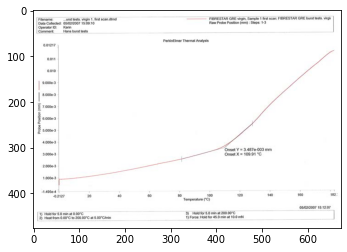

In [22]:
from PIL import Image
from pylab import *

im = Image.open('p22-285.jpg')
imshow(im)